# DM BE2 2024-25
## Démos cours Data Sciences : SVM (support vector machines)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
%matplotlib inline

#### Pour tout afficher (sans print), activer ces lignes.

In [4]:
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

L'objectif est de trouver un hyperplan dans un espace à $n$ dimensions qui sépare les points de données de leurs classes potentielles.     
L'hyperplan doit être positionné avec la distance maximale aux points de données.     
Les points de données avec la distance minimale à l'hyperplan sont appelés **vecteurs de support**.     
En raison de leur position proche, leur influence sur la position exacte de l'hyperplan est plus grande que celle des autres points de données.    
Dans le graphique ci-dessous, les vecteurs de support sont les 3 points (2 bleus, 1 vert) posés sur les lignes.



![SVM](svm.png "SVM")    



Les SVM Désigne également les SVM à base de noyaux où le noyau convertit l'espace de données d'entrée en un espace de dimension supérieure.

L'espace d'entrée X est composé de x et x' : $\phi(x_i)$   


représente la fonction noyau qui transforme l'espace d'entrée en un espace de dimension supérieure, de sorte que tous les points de données ne sont pas explicitement mappés.

La fonction du noyau peut également être écrite comme $k(x,x')$   

La façon dont la fonction est définie et utile pour la pose d'hyperplans dépend des données.   

**Noyaux :**
- linéaire : $k(x_i,x_j) = <x_i , x_j> = < x_i | x_j>$
- Polynomial : $k(x_i,x_j) = (1+<x_i , x_j>)^d$
-  RBF: $k(x_i,x_j) = exp(-\gamma ||x_i - x_j||)^2$   p. ex. $k(x,z) = e^{- (0.01 \ * \ \langle x - z , x - z\rangle^2)}$
- Sigmoïde : $k(x_i,x_j) = tanH(\alpha x^T. y +c)$ 


### Polynomiale : 
![SVM](polynomial.png "Kernel Sigmoid")





### Sigmoide :
![SVM](sigmoide.png "Kernel Polynomile")

### Gaussien
Egalement il y a le  le noyau gaussien :    
$k(x,z) = e^{- \frac{\parallel x-z \parallel^2 }{\sigma}}$   
ou   
$k(x,z) = e^{- \frac{\parallel x-z \parallel^2}{2\sigma^{2}}}$ 

<font color="red"> Sous Python, pour utiliser le noyau Gaussien, on dit "rbf" ! </font>

Gaussien   
<img src="gaussien.png">     

### L'astuce du noyau    
**Que fait la fonction noyau ?**   

Il prend deux points de données $x_i$ et $x_j$ et calcule un score de distance de ceux-ci.    
Ce score est plus élevé pour les points de données plus proches et vice versa.      
L'utilisation de ce score permet de projeter les points de données dans un espace de plus grande dimension, ce qui réduit l'effort et le temps de calcul et est particulièrement utile pour d'énormes quantités de données.     
De plus, cela évite la nécessité d'une transformation plus complexe.   
C'est pourquoi cette étape est souvent appelée **Kernel Trick**.   

Comme on peut le voir dans le graphique ci-dessous, la cartographie des points de données passe d'un espace 2D à un espace 3D à l'aide d'une fonction noyau : $φ(a, b) = (a, b, a^2 + b^2)$.     
Les points rouges précédemment centrés sont maintenant également situés verticalement plus bas lorsqu'ils sont transformés en un espace 3D.    
Les points de données non clairement séparables peuvent maintenant être mieux "séparés" en utilisant ce noyau.

<img src="noyaux.png">

De plus, différents noyaux peuvent aider à poser des hyperplans de formes diverses à travers le nuage de points (données).     
Les limites des hyperplans linéaires sont rapidement dépassées du fait de leur adaptabilité restreinte aux différentes formes. Sur cette base, les différentes fonctions du noyau ont été développées.

L'objectif est de classer correctement autant de points de données que possible en maximisant la marge entre les vecteurs de support et l'hyperplan tout en **minimisant le terme $w^T . w$**.   

En d'autres termes, l'objectif peut également être expliqué comme la recherche de **w** et **b** optimaux pour que'un maximum de données soient prédites correctement.    

Lorsque  tous les points de données ne peuvent pas être parfaitement attribués, une distance à la marge corrigée représentée par le terme supplémentaire $\xi_i $ est envisagée.    

Le vecteur normal crée une ligne passant par l'origine des coordonnées. Les hyperplans coupent cette droite orthogonale à distance $\quad  \dfrac{1}{||w||_2}$ depuis l'origine.   

Pour le cas idéal, on a    $\quad y_i . (w^T \phi(x_i)+b) \geq 1$
et donc parfaitement prédit.     
Ayant maintenant des points de données avec une distance à leur position idéale, nous permet de corriger le cas idéal en $\quad y_i . (w^T \phi(x_i)+b) \geq 1-\xi$

Aussi, un terme de pénalité est introduit dans la formule de minimisation.     
Une constante $C$ agit comme un paramètre de régularisation et contrôle la force de la pénalité concernant le nombre de points de données qui ont été faussement attribués avec une distance totale de $\sum_1^n \xi_i$

A,la suite des calculs, l'utilisation d'un noyau **$k$** et en résolvant le problème d'optimisation qui en résulte, de nouveaux points de données peuvent être classés en utilisant   
<img src="bishop2.png">

Pour la fonction noyau $k(x_n,x_m)$, les fonctions noyau expliquées précédemment (sigmoïde, linéaire, polynomiale, rbf) peuvent être utilisés.

## Classification multiclasse à l'aide de SVM   
Dans  sa forme la plus simple, les SVM sont appliqués sur la classification binaire, divisant les points de données en 1 ou 0.     
Pour la classification multiclasse, le même principe est utilisé.    
Le problème multiclasse est décomposé en plusieurs cas de **classification binaire par paires**, également appelés **un-contre-un** (one-vs-one).     
Dans scikit-learn __one-vs-one__ n'est pas une option par défaut et doit être sélectionné explicitement (voir plus bas dans le code). Notons que **One-vs-rest** est défini par défaut qui divise  les points de données dans une classe **c** et le reste des classes.     
Consécutivement une certaine classe se distingue de toutes les autres classes.

Le nombre de classificateurs nécessaires pour une classification multiclasse **un-contre-un** peut être récupéré avec la formule suivante (avec **n** étant le nombre de classes) : $n(n-1)/2$.   
Dans l'approche un-contre-un, chaque classificateur sépare des points de deux classes différentes et l'ensemble des  classifieurs un-contre-un conduit à un classificateur multiclasse.


## Un dataset simple : Liris


In [2]:

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import svm, datasets
import matplotlib.pyplot as plt
import numpy as np

iris = datasets.load_iris()

# La décision :   y  et 
# les 2 premières caractéristiques :  X (sepal length et sepal width des fleurs)
X = iris.data[:, :2]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state = 0)



Maintenant, on examine les différentes fonctions du noyau.     
Le terme de pénalité **C** est fixé à 1 pour tous les classificateurs (régularisation).     
Pour la classification multiclasse, la stratégie  un-contre-un est utilisée (voir **decision_function_shape='ovo'**).     
Pour la fonction polynomiale, on utilise le degré 3.    
Tous les autres paramètres sont définis par défaut.     

In [3]:
linear = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo').fit(X_train, y_train)
rbf = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo').fit(X_train, y_train)
poly = svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovo').fit(X_train, y_train)
sig = svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovo').fit(X_train, y_train)




Créons une mosaique (un maillage : mesh) de plot :

In [4]:
# modifier au besoin les valeurs pour avoir d'autres résultats
 
h = .01

#creation du maillage
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

# titres des plots
titles = ['Linear kernel','RBF kernel','Polynomial kernel','Sigmoid kernel']


Itérations pour créer les 4 plots  avec les 4 fonctions de Noyau :

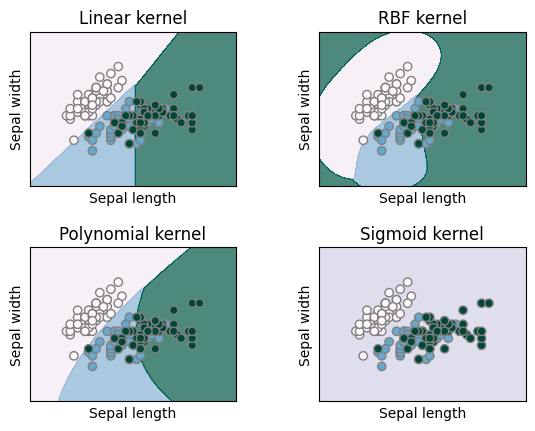

In [5]:
for i, clf in enumerate((linear, rbf, poly, sig)):
    #2 lignes, 2 cols =>   4 plots
    plt.subplot(2, 2, i + 1) #i+1 = index
    
    #éspace entre plots
    plt.subplots_adjust(wspace=0.4, hspace=0.4) 
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    
    # gestion de couleurs
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.PuBuGn, alpha=0.7)
    
    # On Plot aussi les ens d'apprentissage  
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.PuBuGn,     edgecolors='grey')
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
plt.show()

Les **predictions** sur l'ensemble de test avec les 4 noyaux différents

In [6]:
linear_pred = linear.predict(X_test)
poly_pred = poly.predict(X_test)
rbf_pred = rbf.predict(X_test)
sig_pred = sig.predict(X_test)



#### Les  "accuracy" des modèles :

In [7]:

# l'accuracy des 4 fonctions kernel 
accuracy_lin = linear.score(X_test, y_test)
accuracy_poly = poly.score(X_test, y_test)
accuracy_rbf = rbf.score(X_test, y_test)
accuracy_sig = sig.score(X_test, y_test)

print("Accuracy Linear Kernel:", accuracy_lin)
print("Accuracy Polynomial Kernel:", accuracy_poly)
print("Accuracy Radial Basis Kernel:", accuracy_rbf)
print("Accuracy Sigmoid Kernel:", accuracy_sig)


Accuracy Linear Kernel: 0.7333333333333333
Accuracy Polynomial Kernel: 0.7333333333333333
Accuracy Radial Basis Kernel: 0.6666666666666666
Accuracy Sigmoid Kernel: 0.2


On constate que certaines fonctions du noyau sont plus utiles que d'autres, selon les données.     
Et évidemment, davantage de données sera également utiles pour améliorer les résultats (les données de l'iris sont de petite taille avec 50 échantillonsnpar classe).   



Passons à la dernière étape :   **matrices de confusion**   pour les 4 fonctions du noyau  :
    

In [8]:
# matrices de confusion
cm_lin = confusion_matrix(y_test, linear_pred)
cm_poly = confusion_matrix(y_test, poly_pred)
cm_rbf = confusion_matrix(y_test, rbf_pred)
cm_sig = confusion_matrix(y_test, sig_pred)

print("4 matrices de confusion")
print("\nLinéaire avec Accuracy ", accuracy_lin ,": \n", cm_lin)
print("\nPolynomial :avec Accuracy ", accuracy_poly ,": \n", cm_poly)
print("\nRBF avec Accuracy ", accuracy_rbf ,": \n", cm_rbf)
print("\nSigmoide avec Accuracy ", accuracy_sig ,": \n", cm_sig)


4 matrices de confusion

Linéaire avec Accuracy  0.7333333333333333 : 
 [[11  0  0]
 [ 0  8  5]
 [ 0  3  3]]

Polynomial :avec Accuracy  0.7333333333333333 : 
 [[11  0  0]
 [ 0  8  5]
 [ 0  3  3]]

RBF avec Accuracy  0.6666666666666666 : 
 [[11  0  0]
 [ 0  5  8]
 [ 0  2  4]]

Sigmoide avec Accuracy  0.2 : 
 [[ 0  0 11]
 [ 0  0 13]
 [ 0  0  6]]
